# RDD Programming
https://spark.apache.org/docs/latest/rdd-programming-guide.html

RDD stands for Resilient Distributed Dataset, these are the elements that run 
and operate on multiple nodes to do parallel processing on a cluster. 

RDDs are immutable elements, which means once you create an RDD you cannot change it. 

RDDs are fault tolerant as well, hence in case of any failure, they recover automatically. 
    
You can apply multiple operations on these RDDs to achieve a certain task.

There are two ways to create RDD (Resilient Distributed Database)
- Parallelized Collections
- External Databases

In [1]:
from pyspark import SparkContext
# We get the existed Spark Context or create a new one if not existed.
sc = SparkContext.getOrCreate()
# we get data by parallel tuples () in a list [].
data = sc.parallelize([('Jessica', 100), ('Jason', 150), ('Jasmine', 200), ('Jonathan', 300)])
# Another method of working with RDD is to read from a file or database 
#data_file = sc.\textFile('path_anad_filename')

# We collect the data form the distributed sources. 
data_example = sc.parallelize([('Jessica', 100), ('Jason', 150), ('Jasmine', 200), ('Jonathan', 300)]).collect()
print('data_example:', data_example)
print()
print('data_example[2]:', data_example[2])
sc.stop()

data_example: [('Jessica', 100), ('Jason', 150), ('Jasmine', 200), ('Jonathan', 300)]

data_example[2]: ('Jasmine', 200)


In [1]:
from pyspark import SparkContext
# We get the existed Spark Context or create a new one if not existed.
sc = SparkContext.getOrCreate()
# we get data by parallel tuples () in a list [].
data_second = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Another method of working with RDD is to read from a file or database 
#data_file = sc.\textFile('path_anad_filename')

# We collect the data form the distributed sources. 
distData = sc.parallelize (data_second)
distData_sum = distData.reduce(lambda a, b: a + b)
print('distData_sum:', distData_sum )
sc.stop()

distData_sum: 55


# RDD Operations

To apply operations on these RDD's, there are two ways −

- Transformation and
- Action

Let us understand these two ways in detail.

- Transformation − These are the operations, which are applied on a RDD to create a new RDD. 
Filter, groupBy and map are the examples of transformations.
- Action − These are the operations that are applied on RDD, which instructs Spark to perform 
computation and send the result back to the driver.

To apply any operation in PySpark, we need to create a PySpark RDD first. 

The following code block has the detail of a PySpark RDD Class:

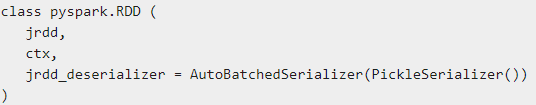

Let us see how to run a few basic operations using PySpark. 

The following code in a Python file creates RDD words, which stores a set of words mentioned.



# Count() Example

We will now run a few operations on words.

count(): Number of elements in the RDD is returned.

In [2]:
# Count.py Example
from pyspark import SparkContext
sc = SparkContext("local", "count app")
words = sc.parallelize (
   ["scala", 
   "java", 
   "hadoop", 
   "spark", 
   "akka",
   "spark vs hadoop", 
   "pyspark",
   "pyspark and spark"]
)
counts = words.count()
print ("Number of elements in RDD -> %i" % (counts))
sc.stop()

Number of elements in RDD -> 8


# Use Spark_submit to run 04_01_RDD_count.py

1. We can use VS Code to edit the same program (04_01_RDD_count.py) as below:


    
2. Under Anconda, We can use command "spark-sumbit 04_01_RDD_count.py" to run.

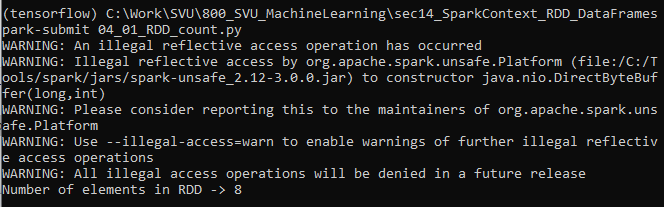

# Collect() Example

collect(): All the elements in the RDD are returned.

In [3]:
from pyspark import SparkContext
sc = SparkContext("local", "Collect app")
words = sc.parallelize (
   ["scala", 
   "java", 
   "hadoop", 
   "spark", 
   "akka",
   "spark vs hadoop", 
   "pyspark",
   "pyspark and spark"]
)
coll = words.collect()
print ("Elements in RDD -> %s" % (coll))
sc.stop()

Elements in RDD -> ['scala', 'java', 'hadoop', 'spark', 'akka', 'spark vs hadoop', 'pyspark', 'pyspark and spark']


# Use spark_submit to run 04_02_RDD_collect.p



# foreach() Example:

foreach(f): Returns only those elements which meet the condition of the function inside foreach. 

In the following example, we call a print function in foreach, which prints all the elements in the RDD.

In [2]:
from pyspark import SparkContext
#sc = SparkContext("local", "ForEach app")
sc = SparkContext.getOrCreate()
words = sc.parallelize (
   ["scala", 
   "java", 
   "hadoop", 
   "spark", 
   "akka",
   "spark vs hadoop", 
   "pyspark",
   "pyspark and spark"]
)
def f(x): print('x:', x)
fore = words.foreach(f)
sc.stop()

# Note:
Jupyter Notebook print the result in the background terminal.



# spark_submit 04_04_RDD_foreach.py

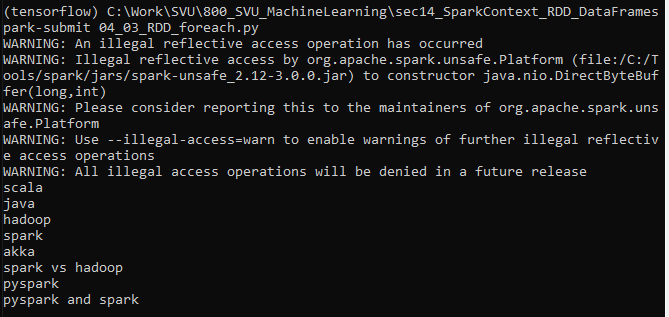

# filter(f) Example
A new RDD is returned containing the elements, 
which satisfies the function inside the filter. 

In the following example, we filter out the strings containing "spark".

In [3]:
from pyspark import SparkContext
# sc = SparkContext("local", "Filter app")
sc = SparkContext.getOrCreate()
words = sc.parallelize (
   ["scala", 
   "java", 
   "hadoop", 
   "spark", 
   "akka",
   "spark vs hadoop", 
   "pyspark",
   "pyspark and spark"]
)
words_filter = words.filter(lambda x: 'spark' in x)
filtered = words_filter.collect()
print ("Fitered RDD -> %s" % (filtered))
sc.stop()

Fitered RDD -> ['spark', 'spark vs hadoop', 'pyspark', 'pyspark and spark']


# map(f, preservesPartitioning = False)

A new RDD is returned by applying a function to each element in the RDD. 

In the following example, we form a key value pair and map every string with a value of 1.

In [7]:
# map.py
from pyspark import SparkContext
# sc = SparkContext("local", "Map app")
sc = SparkContext.getOrCreate()
words = sc.parallelize (
   ["scala", 
    "java", 
    "hadoop", 
    "spark", 
    "akka",
    "spark vs hadoop", 
    "pyspark",
    "pyspark and spark"]
)
words_map = words.map(lambda x: (x, 1))
mapping = words_map.collect()
print ("Key value pair -> %s" % (mapping))
sc.stop()

Key value pair -> [('scala', 1), ('java', 1), ('hadoop', 1), ('spark', 1), ('akka', 1), ('spark vs hadoop', 1), ('pyspark', 1), ('pyspark and spark', 1)]


# reduce(f)
After performing the specified commutative and associative binary operation, the element in the RDD is returned. 

In the following example, 
we are importing add package from the operator and applying it on ‘num’ to carry out a simple addition operation.

In [5]:
from pyspark import SparkContext
from operator import add
#sc = SparkContext("local", "Reduce app")
sc = SparkContext.getOrCreate()
nums = sc.parallelize([1, 2, 3, 4, 5])
# reduce 1 + 2 + 3 + 4 + 5 = 15
adding = nums.reduce(add)
print ("Adding all the elements -> %i" % (adding))
sc.stop()

Adding all the elements -> 15


# join(other, numPartitions = None)

It returns RDD with a pair of elements with the matching keys and all the values for that particular key. 

In the following example, there are two pair of elements in two different RDDs. 

After joining these two RDDs, we get an RDD with elements having matching keys and their values.

In [9]:
# join.py
from pyspark import SparkContext
#sc = SparkContext("local", "Join app")
sc = SparkContext.getOrCreate()
x = sc.parallelize([("spark", 1), ("hadoop", 4)])
y = sc.parallelize([("spark", 2), ("hadoop", 5)])
joined = x.join(y)
final = joined.collect()
print ("Join RDD -> %s" % (final))
sc.stop()

Join RDD -> [('hadoop', (4, 5)), ('spark', (1, 2))]


# cache()

Persist this RDD with the default storage level (MEMORY_ONLY).

You can also check if the RDD is cached or not.

In [13]:
# cache.py
from pyspark import SparkContext 
#sc = SparkContext("local", "Cache app") 
sc = SparkContext.getOrCreate()
words = sc.parallelize (
   ["scala", 
   "java", 
   "hadoop", 
   "spark", 
   "akka",
   "spark vs hadoop", 
   "pyspark",
   "pyspark and spark"]
) 
words.cache() 
caching = words.persist().is_cached 
print ("Words got chached > %s" % (caching))
sc.stop()

Words got chached > True
